<a href="https://colab.research.google.com/github/Nithesh-b/Twitter_Sentiment/blob/post-viva/Step_1_1_Capstone_TwiterNLTK_PolarityCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
dataFolder = "/content/sample_data/outputs"


In [116]:
# Read 01_first_round_clenned_tweets_df.csv file
tweets_df = pd.read_csv(dataFolder+"/Step2_PreProcessing_Group33_Cleaned_Tweets.csv")
print(tweets_df.shape)

(30155, 11)


In [117]:
# from prompt install
#pip install -U textblob
# python -m textblob.download_corpora

from textblob import TextBlob

In [118]:
#% of missing values in each column
def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [119]:
#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 11 columns.
There are 2 columns that have missing values.
             Missing Values  % of Total Values
Clean_tweet             102                0.3
Tweet                    57                0.2


### # Drop NULL Tweet-Text  rows as we use tweet text for text processing 

In [120]:
# Drop NULL Tweet-Text  rows as we use tweet text for text processing 
tweets_df = tweets_df.dropna(subset=["Clean_tweet"])

#### split dataframe based on class

In [121]:
# # Create variable with TRUE
condition = tweets_df['class'] == 1

# # Select all cases where class = 1
negative_df = tweets_df[condition]

In [122]:
negative_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Clean_tweet',
       'Country', 'class'],
      dtype='object')

In [123]:

print(negative_df['class'].value_counts())

1    12222
Name: class, dtype: int64


In [124]:
# Create variable with TRUE
condition = tweets_df['class'] == 0

# Select all cases where class = 0
positive_df = tweets_df[condition]

In [125]:

print(positive_df['class'].value_counts())

0    9942
Name: class, dtype: int64


In [126]:
# Create variable with TRUE
condition = tweets_df['class'] == 2

# # Select all cases where class = 2
neutral_df = tweets_df[condition]

In [127]:

print(neutral_df['class'].value_counts())

2    7889
Name: class, dtype: int64


##### Check the correctness of class for each positive_df , negative_df and neutral_df using TextBlob


##### Process-1
Find sentiment scores (polarity) and sentiment_category for each positive_df , negative_df and neutral_df

#### We will use raw-tweet not the clean one

###### Apart from Text Blob , there are other options  available such as   AFINN lexicon etc

In [128]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in negative_df['Tweet']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# Incorporate sentiment statistics  
df_negative_correctness = pd.DataFrame([list(negative_df['tweet_id']), sentiment_scores_tb, sentiment_category_tb]).T
df_negative_correctness.columns = ['tweet_id', 'sentiment_score', 'sentiment_category']
df_negative_correctness['sentiment_score'] = df_negative_correctness.sentiment_score.astype('float')


In [129]:
df_negative_correctness.head()

,tweet_id,sentiment_score,sentiment_category
0,neg-MG-5,0.050,positive
1,neg-MG-6,-0.500,negative
2,neg-MG-7,-1.000,negative
3,neg-MG-8,0.000,neutral
4,neg-MG-9,0.028,positive


In [130]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in positive_df['Tweet']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df_positive_correctness = pd.DataFrame([list(positive_df['tweet_id']), sentiment_scores_tb, sentiment_category_tb]).T
df_positive_correctness.columns = ['tweet_id', 'sentiment_score', 'sentiment_category']
df_positive_correctness['sentiment_score'] = df_positive_correctness.sentiment_score.astype('float')

In [131]:
df_positive_correctness.head()

,tweet_id,sentiment_score,sentiment_category
0,pos-MG-9042,0.75,positive
1,pos-MG-9043,0.00,neutral
2,pos-MG-9045,0.00,neutral
3,pos-MG-9046,-0.10,negative
4,pos-MG-9047,0.25,positive


In [132]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in neutral_df['Tweet']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


# sentiment statistics per news category
df_neutral_correctness = pd.DataFrame([list(neutral_df['tweet_id']), sentiment_scores_tb, sentiment_category_tb]).T
df_neutral_correctness.columns = ['tweet_id', 'sentiment_score', 'sentiment_category']
df_neutral_correctness['sentiment_score'] = df_neutral_correctness.sentiment_score.astype('float')

In [133]:
df_neutral_correctness.head()

,tweet_id,sentiment_score,sentiment_category
0,neu-GG-Tweet-11945,0.000,neutral
1,neu-GG-Tweet-11944,0.000,neutral
2,neu-GG-Tweet-11943,0.200,positive
3,neu-GG-Tweet-11942,-0.267,negative
4,neu-GG-Tweet-11941,0.500,positive


In [134]:
print(df_positive_correctness.shape)
print(df_negative_correctness.shape)
print(df_neutral_correctness.shape)

(9942, 3)
(12222, 3)
(7889, 3)


In [135]:
#Concatenate above three df

In [136]:
pdList = [df_positive_correctness, df_negative_correctness,df_neutral_correctness]  # List of your dataframes
AllclassCorrected = pd.concat(pdList)

In [137]:
AllclassCorrected.shape

(30053, 3)

In [138]:
AllclassCorrected.dtypes

tweet_id               object
sentiment_score       float64
sentiment_category     object
dtype: object

In [139]:
# save this dataframe 
#Save corrected class data  
AllclassCorrected.to_csv(dataFolder+"/03_AllclassCorrected.csv", index = False)


In [140]:
tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Clean_tweet',
       'Country', 'class'],
      dtype='object')

In [141]:
#Merging tweets_df and AllclassCorrected dataframe  based on tweet_id  unique columns
merge_tweets_df = pd.merge(tweets_df, AllclassCorrected, on='tweet_id')

In [142]:
merge_tweets_df.columns

Index(['tweet_id', 'SourceDataBase', 'OS', 'Tweet-Class_category-Code',
       'Tweet_source', 'Tweeted-By', 'retweet_count', 'Tweet', 'Clean_tweet',
       'Country', 'class', 'sentiment_score', 'sentiment_category'],
      dtype='object')

In [143]:
print(merge_tweets_df['sentiment_category'].value_counts())

positive    11607
neutral     11111
negative     7335
Name: sentiment_category, dtype: int64


In [144]:
# save this dataframe 
#Save corrected class data  
merge_tweets_df.to_csv(dataFolder+"/04_merge_tweets_df.csv", index = False)


### ------------------------------------------  end of Process-1 ----------------------------------------------------

##### Process-2 
### Cleaning - This depends on organization policy, Just for learning

In [145]:
# Read 04_merge_tweets_df.csv file
merge_tweets_df = pd.read_csv(dataFolder+"/04_merge_tweets_df.csv")
print(merge_tweets_df.shape)

(30053, 13)


In [146]:
merge_tweets_df.dtypes

tweet_id                      object
SourceDataBase                object
OS                            object
Tweet-Class_category-Code      int64
Tweet_source                  object
Tweeted-By                    object
retweet_count                  int64
Tweet                         object
Clean_tweet                   object
Country                       object
class                          int64
sentiment_score              float64
sentiment_category            object
dtype: object

In [147]:
print(merge_tweets_df['sentiment_category'].value_counts())

positive    11607
neutral     11111
negative     7335
Name: sentiment_category, dtype: int64


In [148]:
merge_tweets_df.head()

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Clean_tweet,Country,class,sentiment_score,sentiment_category
0,neu-GG-Tweet-11945,MySQL,Windows,99,OTHER,P32013,0,Just landed My ears hurt,just land my ear hurt,Canada,2,0.000,neutral
1,neu-GG-Tweet-11944,MySQL,Windows,99,OTHER,P32012,0,ouch following the ASOT in TweetDeck exceeded ...,ouch follow asot tweetdeck exceed tweet limit,Canada,2,0.000,neutral
2,neu-GG-Tweet-11943,MySQL,Windows,99,OTHER,P32011,0,really wanna see it but no one would go with...,realli want to see one would go lmfao,Canada,2,0.200,positive
3,neu-GG-Tweet-11942,MySQL,Windows,99,OTHER,P32010,0,Ahh this is how you reply had all these rand...,ahh repli random follow do not how sad haha,Canada,2,-0.267,negative
4,neu-GG-Tweet-11941,MySQL,Windows,99,OTHER,P32009,0,awwww and didnt get to be the hero,awwww did not get hero,Canada,2,0.500,positive


### Drop rows in DataFrame where sentiment_category=positive and sentiment_score < 0.30 - This varies from organization to organization

In [149]:
filtered_weak_positive = merge_tweets_df[(merge_tweets_df.sentiment_category == 'positive') & (merge_tweets_df.sentiment_score < 0.30)]

In [150]:
filtered_weak_positive.head()

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Clean_tweet,Country,class,sentiment_score,sentiment_category
2,neu-GG-Tweet-11943,MySQL,Windows,99,OTHER,P32011,0,really wanna see it but no one would go with...,realli want to see one would go lmfao,Canada,2,0.200,positive
10,neu-569248437050302000,Orcale12c,UNIX,99,S6,P208,0,can you please get me to the new york area be...,plea get new york area monday afternoon,USA,2,0.136,positive
11,neu-GG-Tweet-11936,MySQL,Windows,99,OTHER,P32004,0,One final donejust two more to go,one final donejust two go,Canada,2,0.250,positive
13,neu-GG-Tweet-11934,MySQL,Windows,99,OTHER,P32002,0,is nursing one very sore back,nurs one sore back,Canada,2,0.100,positive
28,neu-GG-Tweet-11920,MySQL,Windows,99,S1,P31988,0,haha You wouldnt because youre wearing them,haha you would not you are wear,Canada,2,0.200,positive


In [151]:
print(merge_tweets_df['sentiment_category'].value_counts())

positive    11607
neutral     11111
negative     7335
Name: sentiment_category, dtype: int64


### remove rows from a data frame (merge_tweets_df)  that are identical (tweet_id)  to filtered_week_positive

In [152]:
cond = merge_tweets_df['tweet_id'].isin(filtered_weak_positive['tweet_id'])
merge_tweets_df.drop(merge_tweets_df[cond].index, inplace = True)

In [153]:
print(merge_tweets_df['sentiment_category'].value_counts())

neutral     11111
negative     7335
positive     5885
Name: sentiment_category, dtype: int64


In [154]:
merge_tweets_df.dtypes

tweet_id                      object
SourceDataBase                object
OS                            object
Tweet-Class_category-Code      int64
Tweet_source                  object
Tweeted-By                    object
retweet_count                  int64
Tweet                         object
Clean_tweet                   object
Country                       object
class                          int64
sentiment_score              float64
sentiment_category            object
dtype: object

In [155]:
#Check missing_values again , if any
columnsWiseMissingValue = find_missing_values_func(merge_tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 13 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [156]:
# Drop NULL Tweet-Text  rows as we use tweet text for text processing 
merge_tweets_df = merge_tweets_df.dropna(subset=["Clean_tweet"])

In [157]:
# save this dataframe 
#Save corrected class data  
merge_tweets_df.to_csv(dataFolder+"/05_ProperSentimentClass_tweets_df.csv", index = False)

## Next step _ 22/10/20

In [158]:
# Read 05_ProperSentimentClass_tweets_df.csv file


In [159]:
print(merge_tweets_df.dtypes)

tweet_id                      object
SourceDataBase                object
OS                            object
Tweet-Class_category-Code      int64
Tweet_source                  object
Tweeted-By                    object
retweet_count                  int64
Tweet                         object
Clean_tweet                   object
Country                       object
class                          int64
sentiment_score              float64
sentiment_category            object
dtype: object


## Check Missing value

In [160]:
columnsWiseMissingValue = find_missing_values_func(merge_tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 13 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


## Dropping Tweet column which is un-processed and raw tweet from main dataframe as we will use "Clean_tweet" column for further processing

In [161]:
merge_tweets_df = merge_tweets_df.drop(columns=['Tweet'])

##Rename Clean_tweet column to Tweet so that we can re-use the code 

In [162]:
merge_tweets_df = merge_tweets_df.rename(columns={"Clean_tweet": "Tweet"})

##Dropping "class" column which is old raw class from main dataframe as we will use "sentiment_category" column as a class for further processing

In [163]:
merge_tweets_df = merge_tweets_df.drop(columns=['class'])

##Dropping sentiment_score column which is now not required

In [164]:
merge_tweets_df = merge_tweets_df.drop(columns=['sentiment_score'])

In [165]:
merge_tweets_df

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Country,sentiment_category
0,neu-GG-Tweet-11945,MySQL,Windows,99,OTHER,P32013,0,just land my ear hurt,Canada,neutral
1,neu-GG-Tweet-11944,MySQL,Windows,99,OTHER,P32012,0,ouch follow asot tweetdeck exceed tweet limit,Canada,neutral
3,neu-GG-Tweet-11942,MySQL,Windows,99,OTHER,P32010,0,ahh repli random follow do not how sad haha,Canada,negative
4,neu-GG-Tweet-11941,MySQL,Windows,99,OTHER,P32009,0,awwww did not get hero,Canada,positive
5,neu-569261128532041000,Orcale12c,UNIX,99,S6,P203,0,nervou flight dc lax get cancel flightl tomorr...,USA,neutral
...,...,...,...,...,...,...,...,...,...,...
30047,neg-MG-12262,SQLSERVER,Windows,3,OTHER,PMG12171,0,flight phoenix deboard passeng go salt lake ci...,USA,negative
30049,neg-MG-12264,SQLSERVER,Windows,3,OTHER,PMG12173,0,you are kill insid,USA,neutral
30050,neg-MG-12265,SQLSERVER,Windows,3,OTHER,PMG12174,0,hung anoth wast hour time how suppos book one ...,USA,negative
30051,neg-MG-12266,SQLSERVER,Windows,3,OTHER,PMG12175,0,one agent avail speak,USA,positive


#Extract label_id from sentiment_category - First 3 character label_id so the positive = pos , negative = neg and neutral = neu

In [166]:
label = list(merge_tweets_df['sentiment_category'].str[:3])
merge_tweets_df['label_id'] = pd.Series(label).values

In [167]:
merge_tweets_df

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Country,sentiment_category,label_id
0,neu-GG-Tweet-11945,MySQL,Windows,99,OTHER,P32013,0,just land my ear hurt,Canada,neutral,neu
1,neu-GG-Tweet-11944,MySQL,Windows,99,OTHER,P32012,0,ouch follow asot tweetdeck exceed tweet limit,Canada,neutral,neu
3,neu-GG-Tweet-11942,MySQL,Windows,99,OTHER,P32010,0,ahh repli random follow do not how sad haha,Canada,negative,neg
4,neu-GG-Tweet-11941,MySQL,Windows,99,OTHER,P32009,0,awwww did not get hero,Canada,positive,pos
5,neu-569261128532041000,Orcale12c,UNIX,99,S6,P203,0,nervou flight dc lax get cancel flightl tomorr...,USA,neutral,neu
...,...,...,...,...,...,...,...,...,...,...,...
30047,neg-MG-12262,SQLSERVER,Windows,3,OTHER,PMG12171,0,flight phoenix deboard passeng go salt lake ci...,USA,negative,neg
30049,neg-MG-12264,SQLSERVER,Windows,3,OTHER,PMG12173,0,you are kill insid,USA,neutral,neu
30050,neg-MG-12265,SQLSERVER,Windows,3,OTHER,PMG12174,0,hung anoth wast hour time how suppos book one ...,USA,negative,neg
30051,neg-MG-12266,SQLSERVER,Windows,3,OTHER,PMG12175,0,one agent avail speak,USA,positive,pos


#Convert label_id to numeric class for machine learning

In [168]:
class_dictionary = {'neu' : 2, 'pos' : 0, 'neg' : 1} 
  
# Add a new column named 'class' 
merge_tweets_df['class'] = merge_tweets_df['label_id'].map(class_dictionary)

In [169]:
merge_tweets_df

,tweet_id,SourceDataBase,OS,Tweet-Class_category-Code,Tweet_source,Tweeted-By,retweet_count,Tweet,Country,sentiment_category,label_id,class
0,neu-GG-Tweet-11945,MySQL,Windows,99,OTHER,P32013,0,just land my ear hurt,Canada,neutral,neu,2
1,neu-GG-Tweet-11944,MySQL,Windows,99,OTHER,P32012,0,ouch follow asot tweetdeck exceed tweet limit,Canada,neutral,neu,2
3,neu-GG-Tweet-11942,MySQL,Windows,99,OTHER,P32010,0,ahh repli random follow do not how sad haha,Canada,negative,neg,1
4,neu-GG-Tweet-11941,MySQL,Windows,99,OTHER,P32009,0,awwww did not get hero,Canada,positive,pos,0
5,neu-569261128532041000,Orcale12c,UNIX,99,S6,P203,0,nervou flight dc lax get cancel flightl tomorr...,USA,neutral,neu,2
...,...,...,...,...,...,...,...,...,...,...,...,...
30047,neg-MG-12262,SQLSERVER,Windows,3,OTHER,PMG12171,0,flight phoenix deboard passeng go salt lake ci...,USA,negative,neg,1
30049,neg-MG-12264,SQLSERVER,Windows,3,OTHER,PMG12173,0,you are kill insid,USA,neutral,neu,2
30050,neg-MG-12265,SQLSERVER,Windows,3,OTHER,PMG12174,0,hung anoth wast hour time how suppos book one ...,USA,negative,neg,1
30051,neg-MG-12266,SQLSERVER,Windows,3,OTHER,PMG12175,0,one agent avail speak,USA,positive,pos,0


#Check missing values again , if any

In [170]:
columnsWiseMissingValue = find_missing_values_func(merge_tweets_df) 
print(columnsWiseMissingValue)

Selected dataframe has 12 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


#Pie chart - distribution of class

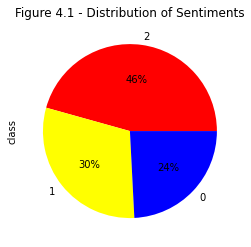

In [171]:
merge_tweets_df["class"].value_counts().plot(title='Figure 4.1 - Distribution of Sentiments', kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "blue"])

#WordCloud of each class 

In [172]:
positive_tweets = ' '.join(merge_tweets_df[merge_tweets_df['class'] == 0]['Tweet'].str.lower())

In [173]:
neutral_tweets = ' ' .join(merge_tweets_df[merge_tweets_df['class'] == 2]['Tweet'].str.lower())

In [174]:
negative_tweets = ' '.join(merge_tweets_df[merge_tweets_df['class'] == 1]['Tweet'].str.lower())

##POSITIVE Tweets Word Cloud

In [175]:
from wordcloud import WordCloud, STOPWORDS

Text(0.5, 1.0, 'Figure 4.2 - Positive tweets Wordcloud')

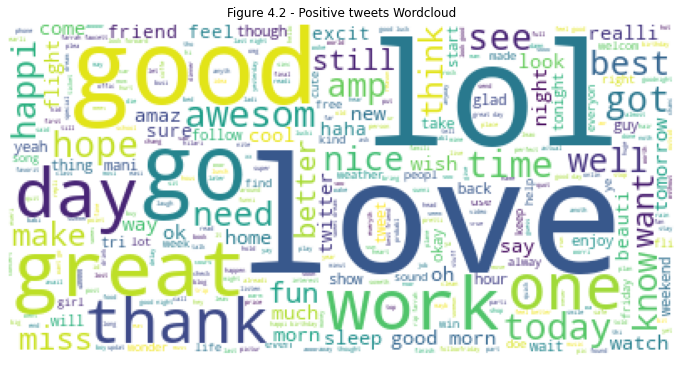

In [176]:
# "stop words", in simple terms it refers to the most common words in a language. 
# These are typically uninformative words, such as "the" or "and", for example, 
# that are thus removed during preprocessing in many Natural Language Processing (NLP) applications.
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Figure 4.2 - Positive tweets Wordcloud")

##NEGATIVE Tweets Word Cloud

Text(0.5, 1.0, 'Figure 4.3 - Negative tweets Wordcloud')

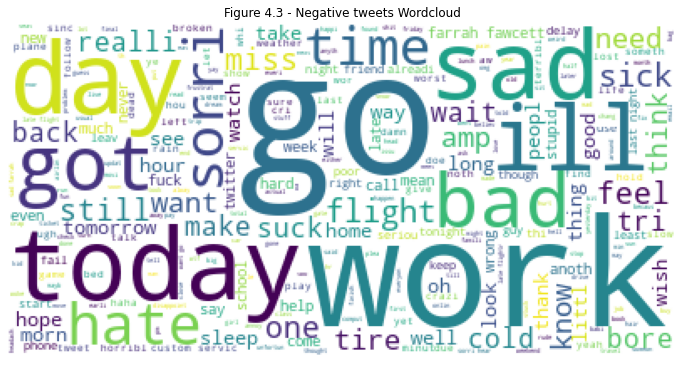

In [177]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Figure 4.3 - Negative tweets Wordcloud")

##NEUTRAL Tweets Word Cloud

Text(0.5, 1.0, 'Figure 4.4 - Neutral tweets Wordcloud')

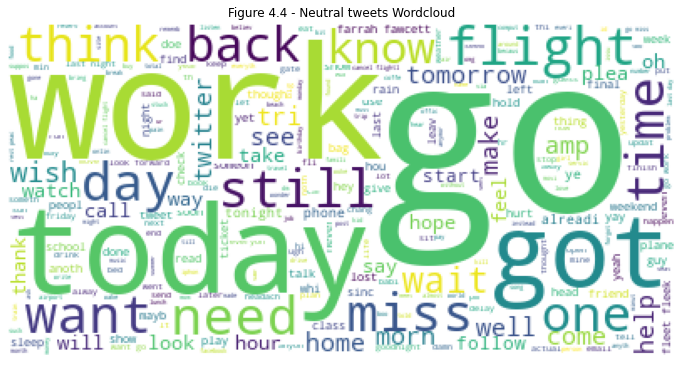

In [178]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(neutral_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Figure 4.4 - Neutral tweets Wordcloud")

# Extract tweet_id,Tweet text and class for ML models

In [179]:
ArrangeCollist = ['tweet_id', 
                  'Tweet', 
                  'class' ]

merge_tweets_df = merge_tweets_df.reindex(columns=ArrangeCollist)

In [180]:
merge_tweets_df

,tweet_id,Tweet,class
0,neu-GG-Tweet-11945,just land my ear hurt,2
1,neu-GG-Tweet-11944,ouch follow asot tweetdeck exceed tweet limit,2
3,neu-GG-Tweet-11942,ahh repli random follow do not how sad haha,1
4,neu-GG-Tweet-11941,awwww did not get hero,0
5,neu-569261128532041000,nervou flight dc lax get cancel flightl tomorr...,2
...,...,...,...
30047,neg-MG-12262,flight phoenix deboard passeng go salt lake ci...,1
30049,neg-MG-12264,you are kill insid,2
30050,neg-MG-12265,hung anoth wast hour time how suppos book one ...,1
30051,neg-MG-12266,one agent avail speak,0


## Write to csv

In [181]:
merge_tweets_df.to_csv(dataFolder+"/Step1.1_PreProcessing_Group33_Cleaned_Tweets.csv", index = False)
print("DATA SAVED")

DATA SAVED


##Setting the features and labels array from the data frame

In [182]:
features = merge_tweets_df.iloc[:, 1].values
labels = merge_tweets_df.iloc[:, -1].values

In [183]:
features.shape

(24331,)

In [184]:
# Processing the features array again to remove special characters, single characters and numbers
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

## TF-IDF using the Scikit-Learn Library

In [185]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [186]:
# Split the dataframe 80:20 preserve the distribution of class - use stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0 ,stratify = merge_tweets_df['class'])

##RandomForestClassifier on Multi-class



In [187]:
from sklearn.ensemble import RandomForestClassifier

#text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
#text_classifier.fit(X_train, y_train)

In [188]:
#predictions = text_classifier.predict(X_test)

In [189]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))
#print(accuracy_score(y_test, predictions))

##GradientBoostingClassifier on Multi-class

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

#text_classifier_gd = GradientBoostingClassifier(random_state=0)
#text_classifier_gd.fit(X_train, y_train)

In [191]:
#gd_predictions = text_classifier_gd.predict(X_test)

In [192]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

#print(confusion_matrix(y_test,gd_predictions))
#print(classification_report(y_test,gd_predictions))
#print(accuracy_score(y_test, gd_predictions))

##Support Vector Machine on Multi-class




In [193]:
from sklearn import svm

#svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [194]:
#svm_predictions = svc.predict(X_test)

In [195]:
#print(confusion_matrix(y_test,svm_predictions))
#print(classification_report(y_test,svm_predictions))
#print(accuracy_score(y_test, svm_predictions))

In [196]:
pos_neg_df = merge_tweets_df[merge_tweets_df['class'] != 2]

In [197]:
pos_neg_df

,tweet_id,Tweet,class
3,neu-GG-Tweet-11942,ahh repli random follow do not how sad haha,1
4,neu-GG-Tweet-11941,awwww did not get hero,0
6,neu-GG-Tweet-11940,oh realli what bummer,1
9,neu-GG-Tweet-11937,wtf whyd flag oop shitti mous click star,1
16,neu-GG-Tweet-11930,stick intel drive one given decent review anan...,1
...,...,...,...
30043,neg-MG-12258,been stuck minut due lavatori issu no beverag ...,1
30047,neg-MG-12262,flight phoenix deboard passeng go salt lake ci...,1
30050,neg-MG-12265,hung anoth wast hour time how suppos book one ...,1
30051,neg-MG-12266,one agent avail speak,0


In [198]:
pos_neg_df["class"] = pos_neg_df["class"].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
pos_neg_df.dtypes

tweet_id      object
Tweet         object
class       category
dtype: object

In [202]:
pos_neg_df.groupby('class').size()

class
0    5885
1    7335
dtype: int64

In [203]:
columnsWiseMissingValue = find_missing_values_func(pos_neg_df) 
print(columnsWiseMissingValue)

Selected dataframe has 3 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [204]:
pos_neg_df

,tweet_id,Tweet,class
3,neu-GG-Tweet-11942,ahh repli random follow do not how sad haha,1
4,neu-GG-Tweet-11941,awwww did not get hero,0
6,neu-GG-Tweet-11940,oh realli what bummer,1
9,neu-GG-Tweet-11937,wtf whyd flag oop shitti mous click star,1
16,neu-GG-Tweet-11930,stick intel drive one given decent review anan...,1
...,...,...,...
30043,neg-MG-12258,been stuck minut due lavatori issu no beverag ...,1
30047,neg-MG-12262,flight phoenix deboard passeng go salt lake ci...,1
30050,neg-MG-12265,hung anoth wast hour time how suppos book one ...,1
30051,neg-MG-12266,one agent avail speak,0


##Setting the features and labels array from the data frame

In [205]:
features_bin = pos_neg_df.iloc[:, 1].values
labels_bin = pos_neg_df.iloc[:, -1].values

In [206]:
features.shape

(24331,)

## TF-IDF using the Scikit-Learn Library

In [207]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_bin = vectorizer.fit_transform(features_bin).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [208]:
# Split the dataframe 80:20 preserve the distribution of class - use stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_bin, labels_bin, test_size=0.2, random_state=0 ,stratify = pos_neg_df['class'])

##RandomForestClassifier on Binary-class


In [209]:
from sklearn.ensemble import RandomForestClassifier

text_classifier_bin = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier_bin.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [210]:
predictions_bin = text_classifier_bin.predict(X_test)

In [219]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import metrics

auc = metrics.roc_auc_score(y_test, predictions_bin)

print(confusion_matrix(y_test,predictions_bin))
print(classification_report(y_test,predictions_bin))
print("Accuracy is", accuracy_score(y_test, predictions_bin))
print("Area under curve is ", auc)

[[1066  111]
 [  93 1374]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1177
           1       0.93      0.94      0.93      1467

    accuracy                           0.92      2644
   macro avg       0.92      0.92      0.92      2644
weighted avg       0.92      0.92      0.92      2644

Accuracy is 0.9228441754916793
Area under curve is  0.921148877688067


##GradientBoostingClassifier on Binary-class

In [220]:
from sklearn.ensemble import GradientBoostingClassifier

text_classifier_gd_bin = GradientBoostingClassifier(random_state=0)
text_classifier_gd_bin.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [221]:
gd_predictions_bin = text_classifier_gd_bin.predict(X_test)

In [222]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import metrics

auc = metrics.roc_auc_score(y_test, gd_predictions_bin)

print(confusion_matrix(y_test,gd_predictions_bin))
print(classification_report(y_test,gd_predictions_bin))
print("Accuracy is", accuracy_score(y_test, gd_predictions_bin))
print("Area under curve is ", auc)

[[ 849  328]
 [  63 1404]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1177
           1       0.81      0.96      0.88      1467

    accuracy                           0.85      2644
   macro avg       0.87      0.84      0.85      2644
weighted avg       0.86      0.85      0.85      2644

Accuracy is 0.8521180030257186
Area under curve is  0.8391903091461603


##Support Vector Machine on Binary-class




In [223]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [224]:
svm_predictions_bin = svc.predict(X_test)

In [225]:
auc = metrics.roc_auc_score(y_test, svm_predictions_bin)

print(confusion_matrix(y_test,svm_predictions_bin))
print(classification_report(y_test,svm_predictions_bin))
print(accuracy_score(y_test, svm_predictions_bin))
print("Accuracy is", accuracy_score(y_test, svm_predictions_bin))
print("Area under curve is ", auc)

[[1089   88]
 [  90 1377]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1177
           1       0.94      0.94      0.94      1467

    accuracy                           0.93      2644
   macro avg       0.93      0.93      0.93      2644
weighted avg       0.93      0.93      0.93      2644

0.93267776096823
Accuracy is 0.93267776096823
Area under curve is  0.9319419758041396


##Logistic Regression on Binary-class



In [226]:
from sklearn.linear_model import LogisticRegression

text_classifier_lr_bin = LogisticRegression(random_state=0).fit(X_train, y_train)

In [227]:
lr_predictions_bin = text_classifier_lr_bin.predict(X_test)

In [228]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

auc = metrics.roc_auc_score(y_test, lr_predictions_bin)

print(confusion_matrix(y_test,lr_predictions_bin))
print(classification_report(y_test,lr_predictions_bin))
print("Accuracy is", accuracy_score(y_test, lr_predictions_bin))
print("Area under curve is ", auc)

[[1062  115]
 [  78 1389]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1177
           1       0.92      0.95      0.94      1467

    accuracy                           0.93      2644
   macro avg       0.93      0.92      0.93      2644
weighted avg       0.93      0.93      0.93      2644

Accuracy is 0.9270045385779122
Area under curve is  0.9245621167815998


##KNeighbors Classifier on Binary-class


In [229]:
from sklearn.neighbors import KNeighborsClassifier

text_classifier_kn_bin = KNeighborsClassifier(n_neighbors=3)
text_classifier_kn_bin.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [230]:
kn_predictions_bin = text_classifier_kn_bin.predict(X_test)

In [231]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

auc = metrics.roc_auc_score(y_test, kn_predictions_bin)

print(confusion_matrix(y_test,kn_predictions_bin))
print(classification_report(y_test,kn_predictions_bin))
print(accuracy_score(y_test, kn_predictions_bin))
print("Accuracy is", accuracy_score(y_test, kn_predictions_bin))
print("Area under curve is ", auc)

[[ 441  736]
 [ 132 1335]]
              precision    recall  f1-score   support

           0       0.77      0.37      0.50      1177
           1       0.64      0.91      0.75      1467

    accuracy                           0.67      2644
   macro avg       0.71      0.64      0.63      2644
weighted avg       0.70      0.67      0.64      2644

0.6717095310136157
Accuracy is 0.6717095310136157
Area under curve is  0.9245621167815998


##### Next step

#### Create the models using H2O package
#! apt-get install default-jre
#!java -version

#! pip install h2o

Models (Time permits)
H2ORandomForestEstimator
H2OGradientBoostingEstimator
H2OStackedEnsembleEstimator
H2OGridSearch
H2OAutoML

